In [ ]:
!pip install imagededup

In [ ]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 1.4MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 194kB 4.2MB/s 
     |████████████████████████████████| 7.4MB 5.1MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=3d64bf92e9ea538d135276497420d992e74aa15f08da8dbff2537c7927cd59f2
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=f403675947bb4fc7a43cbab4178a4dd0c5814c0b286b99dd8ce190086555e140
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=f9dae777f1689ac7a4dc218e4323be6ec092bd4b5b22ac61cd445a48062b2348
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da206

In [ ]:
from newspaper import Article

In [ ]:
# url = 'https://www.altnews.in/no-dean-koontzs-1981-novel-did-not-predict-coronavirus-emerging-from-china/'
url = 'https://www.nytimes.com/2020/04/11/us/speeding-tickets-cars-coronavirus.html'
article = Article(url)

In [ ]:
article.download()

In [ ]:
article.parse()

In [ ]:
article.top_image

'https://static01.nyt.com/images/2020/04/10/us/00virus-speeding-top/merlin_171483261_76871cd2-71f5-43e8-923c-4a98559576ce-facebookJumbo.jpg'

In [ ]:
import urllib

In [ ]:
urllib.request.urlretrieve(article.top_image, "image_dir/article_test.jpg")

('image_dir/article_top.jpg', <http.client.HTTPMessage at 0x7f123e662c88>)

In [ ]:
from pathlib import Path
import imagededup

In [ ]:
image_dir = Path('image_dir')

In [ ]:
from imagededup.methods import PHash

phasher = PHash()
duplicates = phasher.find_duplicates(image_dir=image_dir, scores=True)

2020-04-10 10:43:11,517: INFO Start: Calculating hashes...
100%|██████████| 3/3 [00:00<00:00, 32.20it/s]
2020-04-10 10:43:11,734: INFO End: Calculating hashes!
2020-04-10 10:43:11,736: INFO Start: Evaluating hamming distances for getting duplicates
2020-04-10 10:43:11,738: INFO Start: Retrieving duplicates using Cython Brute force algorithm
100%|██████████| 3/3 [00:00<00:00, 9671.72it/s]
2020-04-10 10:43:11,854: INFO End: Retrieving duplicates using Cython Brute force algorithm
2020-04-10 10:43:11,855: INFO End: Evaluating hamming distances for getting duplicates


In [ ]:
duplicates

{'Apple.png': [],
 'article_test.jpg': [('article_top.jpg', 0)],
 'article_top.jpg': [('article_test.jpg', 0)]}

/usr/local/lib/python3.6/dist-packages/imagededup/utils/plotter.py:66: UserWarning: tight_layout: falling back to Agg renderer
  gs.tight_layout(fig)


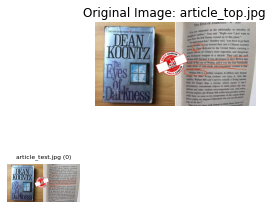

In [ ]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates, filename='article_top.jpg')

In [ ]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_cnn = cnn_encoder.find_duplicates(image_dir=image_dir, scores=True)

17227776/17225924 [==============================] - 0s 0us/step


2020-04-10 10:44:00,556: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
2020-04-10 10:44:00,560: INFO Start: Image encoding generation


Instructions for updating:
Please use Model.predict, which supports generators.
1/1 [==============================] - 0s 2ms/step


2020-04-10 10:44:07,373: INFO End: Image encoding generation
2020-04-10 10:44:07,374: INFO Start: Calculating cosine similarities...
2020-04-10 10:44:07,377: INFO End: Calculating cosine similarities.


In [ ]:
duplicates_cnn

{'01.jpg': [('article_test.jpg', 0.9999999)],
 'Apple.png': [],
 'article_test.jpg': [('01.jpg', 0.9999999)]}

/usr/local/lib/python3.6/dist-packages/imagededup/utils/plotter.py:66: UserWarning: tight_layout: falling back to Agg renderer
  gs.tight_layout(fig)


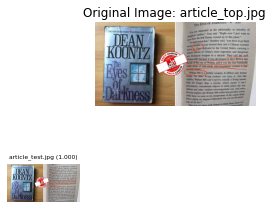

In [ ]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_cnn, filename='article_top.jpg')